In [0]:
!rm -rf eternal-learning

In [26]:
!git clone https://github.com/Dibakarroy1997/eternal-learning.git

Cloning into 'eternal-learning'...
remote: Counting objects: 15577, done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 15577 (delta 10), reused 23 (delta 5), pack-reused 15548
Receiving objects: 100% (15577/15577), 348.01 MiB | 39.92 MiB/s, done.
Resolving deltas: 100% (338/338), done.
Checking out files: 100% (20563/20563), done.


In [27]:
!ls 

cats_and_dogs.h5  datalab  eternal-learning


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_path = 'eternal-learning/Deep Learning/Keras/dataset/training_set'
valid_path = 'eternal-learning/Deep Learning/Keras/dataset/validation_set'

In [0]:
def plot(imgs, labels, row, col):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(18, 5))

    count = 0

    for i in range(row):
        for j in range(col):
            axes[i][j].grid(False)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].imshow(imgs[count])
            axes[i][j].set_title('cat' if (labels[count] == 0) else 'dog')
            count = count + 1

    plt.tight_layout()    

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

In [0]:
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory(valid_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=20)
# valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=10)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256, 256), classes=['cats', 'dogs'], batch_size=20)

Found 7800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


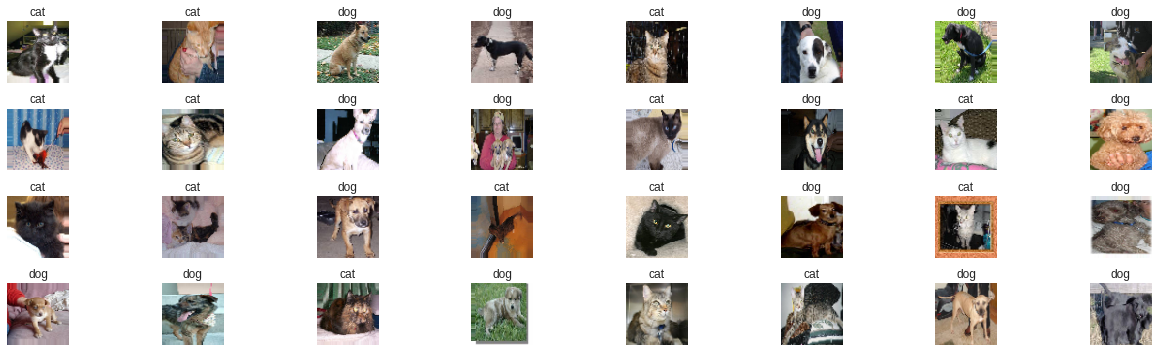

In [37]:
imgs, labels = next(training_set)
plot(imgs, labels, row=4, col=8)

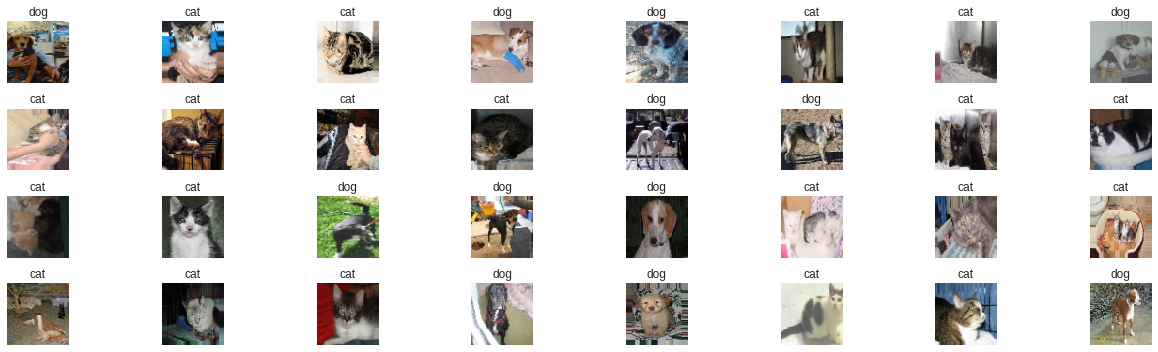

In [38]:
imgs, labels = next(training_set)
plot(imgs, labels, row=4, col=8)

In [0]:
classifier.fit_generator(training_set,
                         epochs = 25,
                         validation_data = validation_set,
                         validation_steps = 2000,
                         steps_per_epoch=244)

In [17]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [18]:
classifier.get_weights()

[array([[[[ 7.88805634e-02,  5.76694198e-02, -8.71550962e-02,
            1.15010865e-01, -4.85772677e-02,  1.23961180e-01,
            7.29281232e-02, -6.40131012e-02, -1.60637014e-02,
            1.23774640e-01,  7.10435957e-03,  7.16005862e-02,
           -6.67050257e-02, -4.09835093e-02, -1.24108657e-01,
           -2.35173583e-01, -1.41935930e-01, -5.38434535e-02,
            1.02006018e-01, -2.18388140e-01,  2.29828190e-02,
            2.78106742e-02, -5.52508011e-02, -8.84024147e-03,
           -1.77610517e-02,  1.21165246e-01, -1.27961531e-01,
            1.02962390e-01, -1.33691266e-01, -1.17768139e-01,
           -6.92705140e-02,  5.68532967e-04],
          [ 9.33312103e-02,  1.72227189e-01, -1.62695214e-01,
           -1.51637107e-01, -2.17166945e-01,  7.80057460e-02,
           -1.85124233e-01,  5.77665828e-02, -1.48551077e-01,
           -9.40007567e-02, -1.36282295e-01, -8.60585943e-02,
           -5.01090214e-02, -6.70782402e-02,  6.75861686e-02,
           -1.32537365e-

In [19]:
classifier.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 64, 64, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity

In [0]:
classifier.save('cats_and_dogs.h5')

In [0]:
# save as JSON
json_string = classifier.to_json()

# save as YAML
yaml_string = classifier.to_yaml()

In [22]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_1", "trainable": true, "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "filters": 32, "kernel_size": [3, 3], "strides": [1

In [23]:
print(yaml_string)

backend: tensorflow
class_name: Sequential
config:
- class_name: Conv2D
  config:
    activation: linear
    activity_regularizer: null
    batch_input_shape: !!python/tuple [null, 64, 64, 3]
    bias_constraint: null
    bias_initializer:
      class_name: Zeros
      config: {}
    bias_regularizer: null
    data_format: channels_last
    dilation_rate: &id002 !!python/tuple [1, 1]
    dtype: float32
    filters: 32
    kernel_constraint: null
    kernel_initializer:
      class_name: VarianceScaling
      config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
    kernel_regularizer: null
    kernel_size: !!python/tuple [3, 3]
    name: conv2d_1
    padding: valid
    strides: &id003 !!python/tuple [1, 1]
    trainable: true
    use_bias: true
- class_name: MaxPooling2D
  config:
    data_format: channels_last
    name: max_pooling2d_1
    padding: valid
    pool_size: &id001 !!python/tuple [2, 2]
    strides: *id001
    trainable: true
- class_name: Conv2D
  config:


In [0]:
from google.colab import files
files.download('cats_and_dogs.h5')

In [0]:
from keras.models import load_model
classifier = load_model('cats_and_dogs.h5')

In [69]:
test_path = 'eternal-learning/Deep Learning/Keras/dataset/test_set'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 200,
                                            class_mode = 'binary')

Found 200 images belonging to 2 classes.


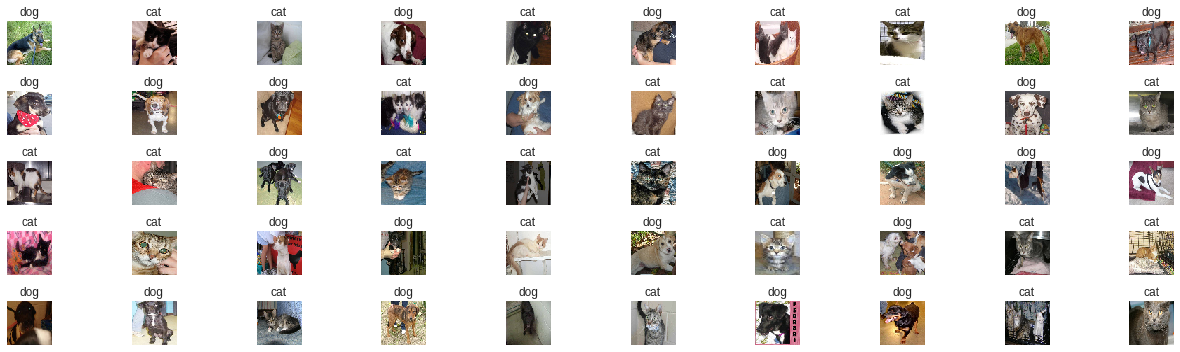

In [70]:
imgs, labels = next(test_set)
plot(imgs, labels, row=5, col=10)

In [73]:
labels

array([1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
predictions = classifier.predict_generator(test_set, steps=1, verbose=0)

In [75]:
np.round(predictions[:, 0])

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [77]:
cm = confusion_matrix(labels, np.round(predictions[:, 0]))
cm

array([[75, 25],
       [19, 81]])

In [0]:
# source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[75 25]
 [19 81]]


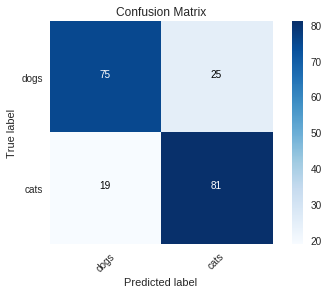

In [81]:
cm_plot_labels = ['dogs','cats']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [84]:
# Accuracy: Overall, how often is the classifier correct? (TP+TN)/total

print('Overall accuracy:', str((cm[0][0] + cm[1][1])/np.sum(cm) * 100) + '%')

Overall accuracy: 78.0%
